## This project aims to gain insights from football matches
The dataset was got from kaggle in January 2022.

A couple of questions are to be answered such as
1. Which team(s) scored the most goals in FIFA World Cup 2014?
2. Country with most world cup wins ever
3. The tournament with most goals
4. Best teams in major tournaments
5. Correlation between home ground and home_win



Other insights will be derived during the course of the analysis


Firstly, all the necessary libraries were imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The csv file was read into a pandas dataframe

In [2]:
df = pd.read_csv('results.csv')

A quick check on the first five rows of the dataframe using the head function

In [3]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


It can be observed that the first match here was played in 1872. A quick Google search confirms that this is the first official football match in history.

In [4]:
df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43081,2021-12-15,Tunisia,Egypt,NaN,NaN,Arab Cup,Doha,Qatar,True
43082,2021-12-15,Qatar,Algeria,NaN,NaN,Arab Cup,Doha,Qatar,False
43083,2021-12-18,NaN,NaN,NaN,NaN,Arab Cup,Doha,Qatar,NaN
43084,2021-12-18,NaN,NaN,NaN,NaN,Arab Cup,Al Khor,Qatar,NaN
43085,2021-12-18,United States,Bosnia and Herzegovina,NaN,NaN,Friendly,Los Angeles,United States,False


It can be observed that the data was sorted using the date column from earliest football matches to the latest as at the time. 1872 to 2021.

The info function was used to check the total number of columns, the datatype of each column as well as the number of rows

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43086 entries, 0 to 43085
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        43086 non-null  object 
 1   home_team   43084 non-null  object 
 2   away_team   43084 non-null  object 
 3   home_score  43081 non-null  float64
 4   away_score  43081 non-null  float64
 5   tournament  43086 non-null  object 
 6   city        43086 non-null  object 
 7   country     43086 non-null  object 
 8   neutral     43084 non-null  object 
dtypes: float64(2), object(7)
memory usage: 3.0+ MB


the number of rows and columns can also be checked using the shape function

In [6]:
df.shape

(43086, 9)

In [7]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

The dataframe was checked for null/missing values

In [8]:
df.isna().sum()

date          0
home_team     2
away_team     2
home_score    5
away_score    5
tournament    0
city          0
country       0
neutral       2
dtype: int64

It can be seen that there are a few missing values. I proceeded to check for the missing values

In [9]:
df[df['home_score'].isna()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43081,2021-12-15,Tunisia,Egypt,NaN,NaN,Arab Cup,Doha,Qatar,True
43082,2021-12-15,Qatar,Algeria,NaN,NaN,Arab Cup,Doha,Qatar,False
43083,2021-12-18,NaN,NaN,NaN,NaN,Arab Cup,Doha,Qatar,NaN
43084,2021-12-18,NaN,NaN,NaN,NaN,Arab Cup,Al Khor,Qatar,NaN
43085,2021-12-18,United States,Bosnia and Herzegovina,NaN,NaN,Friendly,Los Angeles,United States,False


By digging into the 5 missing values in the home_score column, I found out that all the other missing values are contained here as well. 2  missing values in home_team, 2 in away_team, 5 in away_team and 2 in neutral.

I proceeded to drop these 5 rows from the dataframe and continue the analysis using clean data.

In [10]:
df_cleaned = df.dropna()

A quick check for missing values after dropping the missing rows. 

In [11]:
df_cleaned.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

The cleaned data now has 43,081 rows

In [12]:
df_cleaned.shape

(43081, 9)

creating a copy of the cleaned data

In [13]:
df2=df_cleaned.copy() 

In [14]:
df2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43076,2021-12-10,Tunisia,Oman,2.0,1.0,Arab Cup,Al Rayyan,Qatar,True
43077,2021-12-10,Qatar,United Arab Emirates,5.0,0.0,Arab Cup,Al Khor,Qatar,False
43078,2021-12-11,Egypt,Jordan,3.0,1.0,Arab Cup,Al Wakrah,Qatar,True
43079,2021-12-11,Morocco,Algeria,2.0,2.0,Arab Cup,Doha,Qatar,True


Using value_counts function to check the top 20 tournaments with most matches

a function to return the home_score and away_score as integers and not floats

In [15]:
def score_to_int(score):
    score=int(score)
    return score

In [16]:
df2['home_score'] = df2.apply(lambda x: score_to_int(x['home_score']), axis=1)
df2['away_score'] = df2.apply(lambda x: score_to_int(x['away_score']), axis=1)


Checking the datatypes of the columns after conversion

In [17]:
df2.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral       object
dtype: object

[Text(0, 0, '17243'),
 Text(0, 0, '7879'),
 Text(0, 0, '2582'),
 Text(0, 0, '1719'),
 Text(0, 0, '900'),
 Text(0, 0, '841'),
 Text(0, 0, '728'),
 Text(0, 0, '690'),
 Text(0, 0, '620'),
 Text(0, 0, '606'),
 Text(0, 0, '595'),
 Text(0, 0, '505'),
 Text(0, 0, '380'),
 Text(0, 0, '370'),
 Text(0, 0, '358'),
 Text(0, 0, '350'),
 Text(0, 0, '337'),
 Text(0, 0, '309'),
 Text(0, 0, '308'),
 Text(0, 0, '293')]

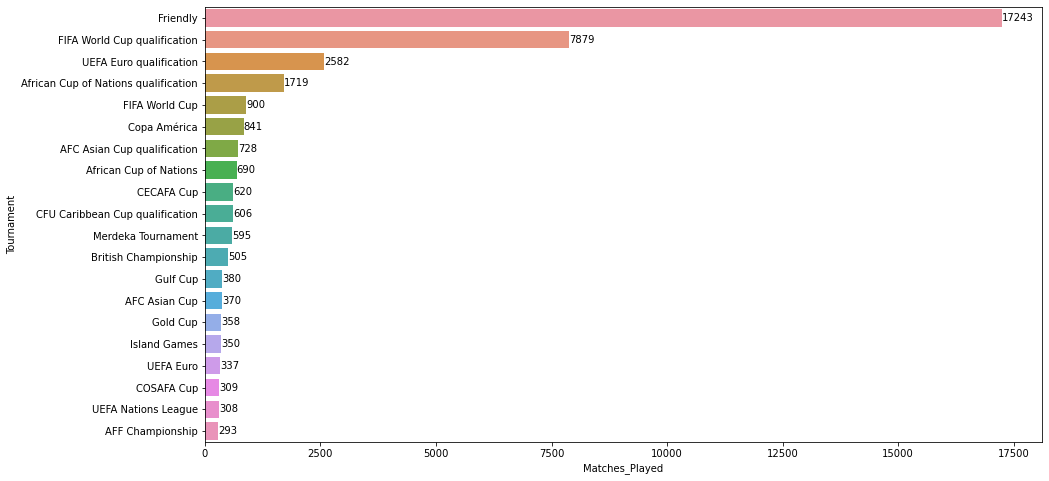

In [18]:
df_barp = df2['tournament'].value_counts().head(20).reset_index()
df_barp = df_barp.rename(columns={'index':'Tournament','tournament':'Matches_Played'})
plt.figure(figsize=(15,8))
ax = sns.barplot(y='Tournament',x='Matches_Played', data=df_barp)
ax.bar_label(ax.containers[0])

A function to show the winning team name or return a draw in the case of a drawn match

In [19]:
def winning_team(home_score, away_score, home_team, away_team):
    if (home_score > away_score):
        winner = home_team
    elif (home_score < away_score):
        winner = away_team
    else:
        winner = 'Draw'
    return winner

A function to show the losing team name or return a draw in the case of a drawn match

In [20]:
def losing_team(home_score, away_score, home_team, away_team):
    if (home_score < away_score):
        loser = home_team
    elif (home_score > away_score):
        loser = away_team
    else:
        loser = 'Draw'
    return loser

Creating a new column to show the winner and loser using the above function

In [21]:
df2['winner']=df2.apply(lambda x: winning_team(x['home_score'], x['away_score'], x['home_team'], x['away_team']), axis=1)
df2['loser']=df2.apply(lambda x: losing_team(x['home_score'], x['away_score'], x['home_team'], x['away_team']), axis=1)

Checking for the newly added winner column and its contents

In [22]:
df2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England
...,...,...,...,...,...,...,...,...,...,...,...
43076,2021-12-10,Tunisia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True,Tunisia,Oman
43077,2021-12-10,Qatar,United Arab Emirates,5,0,Arab Cup,Al Khor,Qatar,False,Qatar,United Arab Emirates
43078,2021-12-11,Egypt,Jordan,3,1,Arab Cup,Al Wakrah,Qatar,True,Egypt,Jordan
43079,2021-12-11,Morocco,Algeria,2,2,Arab Cup,Doha,Qatar,True,Draw,Draw


Defining a function to return the scoreline using the home_score and away_score as inputs

In [23]:
def scoreline(score1, score2):
    scores = str(score1) + "-" + str(score2)
    return scores

In [24]:
#testing the code by passing 2 integers
scoreline(2,1)

'2-1'

Using the code to create a new column scoreline which returns the match scoreline

In [25]:
df2['scoreline'] = df2.apply(lambda x: scoreline(x['home_score'], x['away_score']), axis=1)

A quick check of the added column

In [26]:
df2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Draw,0-0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,4-2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,2-1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,Draw,2-2
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,3-0
...,...,...,...,...,...,...,...,...,...,...,...,...
43076,2021-12-10,Tunisia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True,Tunisia,Oman,2-1
43077,2021-12-10,Qatar,United Arab Emirates,5,0,Arab Cup,Al Khor,Qatar,False,Qatar,United Arab Emirates,5-0
43078,2021-12-11,Egypt,Jordan,3,1,Arab Cup,Al Wakrah,Qatar,True,Egypt,Jordan,3-1
43079,2021-12-11,Morocco,Algeria,2,2,Arab Cup,Doha,Qatar,True,Draw,Draw,2-2


A function to determine the total number of goals scored in a match

In [27]:
def goals_sum(score1,score2):
    scores = score1 + score2
    return scores

Applying the function to create a new column 'total_goals' 

In [28]:
df2['total_goals'] = df2.apply(lambda x: goals_sum(x['home_score'], x['away_score']), axis=1)
df2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Draw,0-0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,4-2,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,2-1,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,Draw,2-2,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,3-0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43076,2021-12-10,Tunisia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True,Tunisia,Oman,2-1,3
43077,2021-12-10,Qatar,United Arab Emirates,5,0,Arab Cup,Al Khor,Qatar,False,Qatar,United Arab Emirates,5-0,5
43078,2021-12-11,Egypt,Jordan,3,1,Arab Cup,Al Wakrah,Qatar,True,Egypt,Jordan,3-1,4
43079,2021-12-11,Morocco,Algeria,2,2,Arab Cup,Doha,Qatar,True,Draw,Draw,2-2,4


In [29]:
df2['total_goals'] = df2.apply(lambda x: goals_sum(x['home_score'], x['away_score']), axis=1)
df2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Draw,0-0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,4-2,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,2-1,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,Draw,2-2,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,3-0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43076,2021-12-10,Tunisia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True,Tunisia,Oman,2-1,3
43077,2021-12-10,Qatar,United Arab Emirates,5,0,Arab Cup,Al Khor,Qatar,False,Qatar,United Arab Emirates,5-0,5
43078,2021-12-11,Egypt,Jordan,3,1,Arab Cup,Al Wakrah,Qatar,True,Egypt,Jordan,3-1,4
43079,2021-12-11,Morocco,Algeria,2,2,Arab Cup,Doha,Qatar,True,Draw,Draw,2-2,4


Calculating the total number of goals scored in the cleaned dataset

In [30]:
df2['total_goals'].sum()

126091

Drilling down to the most popular sporting event in the world - The FIFA World Cup

In [31]:
df2['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'Arab Cup', 'South Pacific Games',
       'CONCACAF Champ

In [32]:
df_wc = df2[df2['tournament']=='FIFA World Cup']
df_wc.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
1314,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,Belgium,0-3,3
1315,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France,Mexico,4-1,5
1316,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia,Brazil,1-2,3
1317,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Romania,Peru,1-3,4
1318,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina,France,1-0,1


Total number of goals scored in the world cup since its inception 

In [33]:
df_wc['total_goals'].sum()

2548

The distribution of total goals scored in a FIFA World Cup match. 

<AxesSubplot:xlabel='tournament', ylabel='total_goals'>

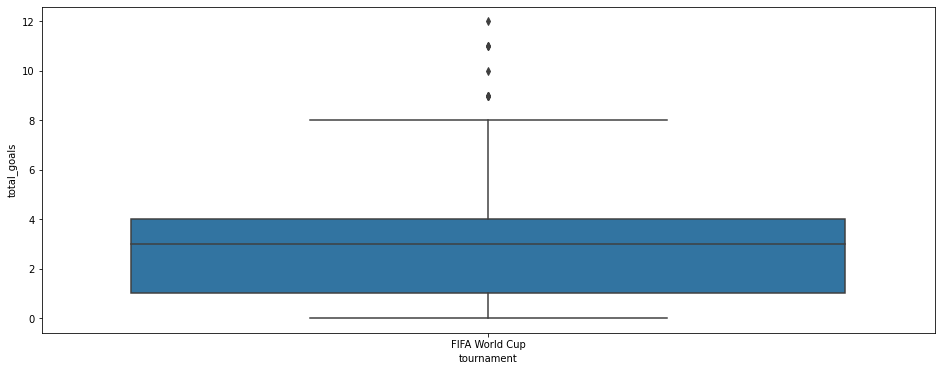

In [34]:
plt.figure(figsize=(16,6))
#plt.xticks(rotation = 45)
sns.boxplot(x="tournament", y="total_goals", data=df_wc)

The boxplot shows that the distribution of the total goals scored in a FIFA World cup match is concentrated betweem 1 and 4 with  a few outliers of up to 8 to 12 goals. Let's check for matches where 8 goals and above were scored. 

Further drilling down to the world cup in 2014

In [35]:
df_wc2014 = df_wc[(df_wc['date']>'2014-01-01') & (df_wc['date']<'2015-01-01')]
df_wc2014

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
36219,2014-06-12,Brazil,Croatia,3,1,FIFA World Cup,São Paulo,Brazil,False,Brazil,Croatia,3-1,4
36220,2014-06-13,Chile,Australia,3,1,FIFA World Cup,Cuiabá,Brazil,True,Chile,Australia,3-1,4
36221,2014-06-13,Mexico,Cameroon,1,0,FIFA World Cup,Natal,Brazil,True,Mexico,Cameroon,1-0,1
36222,2014-06-13,Spain,Netherlands,1,5,FIFA World Cup,Salvador,Brazil,True,Netherlands,Spain,1-5,6
36223,2014-06-14,Colombia,Greece,3,0,FIFA World Cup,Belo Horizonte,Brazil,True,Colombia,Greece,3-0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36284,2014-07-05,Netherlands,Costa Rica,0,0,FIFA World Cup,Salvador,Brazil,True,Draw,Draw,0-0,0
36286,2014-07-08,Brazil,Germany,1,7,FIFA World Cup,Belo Horizonte,Brazil,False,Germany,Brazil,1-7,8
36287,2014-07-09,Netherlands,Argentina,0,0,FIFA World Cup,São Paulo,Brazil,True,Draw,Draw,0-0,0
36289,2014-07-12,Brazil,Netherlands,0,3,FIFA World Cup,Brasília,Brazil,False,Netherlands,Brazil,0-3,3


checking for the match that produced most goals in the 2014 FIFA world cup

In [36]:
#firstly, we get the max number of goals scored in a match in FIFA world cup 2014
df_wc2014['total_goals'].max()

8

In [37]:
#then we save this in a variable and use it to get the full details of the match in the cleaned dataset
max_goals_wc2014 = df_wc2014['total_goals'].max()
df_wc2014[df_wc2014['total_goals']==max_goals_wc2014]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
36286,2014-07-08,Brazil,Germany,1,7,FIFA World Cup,Belo Horizonte,Brazil,False,Germany,Brazil,1-7,8


Checking for the top 10 matches that produced most goals

In [38]:
matches_with_most_goals_wc2014 = df_wc2014.sort_values('total_goals',ascending=False)
matches_with_most_goals_wc2014.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
36286,2014-07-08,Brazil,Germany,1,7,FIFA World Cup,Belo Horizonte,Brazil,False,Germany,Brazil,1-7,8
36245,2014-06-20,Switzerland,France,2,5,FIFA World Cup,Salvador,Brazil,True,France,Switzerland,2-5,7
36252,2014-06-22,South Korea,Algeria,2,4,FIFA World Cup,Porto Alegre,Brazil,True,Algeria,South Korea,2-4,6
36222,2014-06-13,Spain,Netherlands,1,5,FIFA World Cup,Salvador,Brazil,True,Netherlands,Spain,1-5,6
36266,2014-06-25,Nigeria,Argentina,2,3,FIFA World Cup,Porto Alegre,Brazil,True,Argentina,Nigeria,2-3,5
36255,2014-06-23,Brazil,Cameroon,4,1,FIFA World Cup,Brasília,Brazil,False,Brazil,Cameroon,4-1,5
36236,2014-06-18,Australia,Netherlands,2,3,FIFA World Cup,Curitiba,Brazil,True,Netherlands,Australia,2-3,5
36261,2014-06-24,Japan,Colombia,1,4,FIFA World Cup,Cuiabá,Brazil,True,Colombia,Japan,1-4,5
36262,2014-06-25,Bosnia and Herzegovina,Iran,3,1,FIFA World Cup,Salvador,Brazil,True,Bosnia and Herzegovina,Iran,3-1,4
36253,2014-06-22,United States,Portugal,2,2,FIFA World Cup,Manaus,Brazil,True,Draw,Draw,2-2,4


In [39]:
#similarly, the match with most goals could have simply been shown using the above approach
match_with_most_goals_wc2014 = df_wc2014.sort_values('total_goals',ascending=False)
match_with_most_goals_wc2014.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
36286,2014-07-08,Brazil,Germany,1,7,FIFA World Cup,Belo Horizonte,Brazil,False,Germany,Brazil,1-7,8


Checking for the total number of teams that played at least a game as home team

In [40]:
len(df_wc2014['home_team'].unique())

32

Checking for the total number of teams that played at least a game as away team

In [41]:
len(df_wc2014['away_team'].unique())

31

#### It is clear that there is a slight discrepancy here. 32 teams partook in the world cup and only one team played all its games as a home_team. The host nation Brazil.

In [42]:
home_team_list_wc2014 = df_wc2014['home_team'].unique().tolist()
away_team_list_wc2014 = df_wc2014['away_team'].unique().tolist()
team_list_wc2014 = home_team_list_wc2014 + away_team_list_wc2014
team_list_wc2014

['Brazil',
 'Chile',
 'Mexico',
 'Spain',
 'Colombia',
 'England',
 'Ivory Coast',
 'Uruguay',
 'Argentina',
 'France',
 'Switzerland',
 'Germany',
 'Ghana',
 'Iran',
 'Belgium',
 'Russia',
 'Australia',
 'Cameroon',
 'Japan',
 'Honduras',
 'Italy',
 'Nigeria',
 'South Korea',
 'United States',
 'Croatia',
 'Netherlands',
 'Costa Rica',
 'Greece',
 'Bosnia and Herzegovina',
 'Ecuador',
 'Algeria',
 'Portugal',
 'Croatia',
 'Australia',
 'Cameroon',
 'Netherlands',
 'Greece',
 'Italy',
 'Japan',
 'Costa Rica',
 'Bosnia and Herzegovina',
 'Honduras',
 'Ecuador',
 'Portugal',
 'United States',
 'Nigeria',
 'Algeria',
 'Mexico',
 'South Korea',
 'Chile',
 'Ivory Coast',
 'England',
 'France',
 'Iran',
 'Ghana',
 'Russia',
 'Spain',
 'Uruguay',
 'Colombia',
 'Switzerland',
 'Argentina',
 'Belgium',
 'Germany']

In [43]:
len(team_list_wc2014)

63

In [44]:
team_array_wc2014 = np.array(team_list_wc2014)
team_array_wc2014

array(['Brazil', 'Chile', 'Mexico', 'Spain', 'Colombia', 'England',
       'Ivory Coast', 'Uruguay', 'Argentina', 'France', 'Switzerland',
       'Germany', 'Ghana', 'Iran', 'Belgium', 'Russia', 'Australia',
       'Cameroon', 'Japan', 'Honduras', 'Italy', 'Nigeria', 'South Korea',
       'United States', 'Croatia', 'Netherlands', 'Costa Rica', 'Greece',
       'Bosnia and Herzegovina', 'Ecuador', 'Algeria', 'Portugal',
       'Croatia', 'Australia', 'Cameroon', 'Netherlands', 'Greece',
       'Italy', 'Japan', 'Costa Rica', 'Bosnia and Herzegovina',
       'Honduras', 'Ecuador', 'Portugal', 'United States', 'Nigeria',
       'Algeria', 'Mexico', 'South Korea', 'Chile', 'Ivory Coast',
       'England', 'France', 'Iran', 'Ghana', 'Russia', 'Spain', 'Uruguay',
       'Colombia', 'Switzerland', 'Argentina', 'Belgium', 'Germany'],
      dtype='<U22')

Combining the two lists gives us a total of 63, there are repeated values here however because most teams are contained in the two lists. 

In [45]:
len(team_array_wc2014)

63

The total number of distinct teams in the world cup 2014 is determined using the numpy unique function

In [46]:
len(np.unique(team_array_wc2014))

32

A function to return the total number of goals scored by a country as well as details of each match is shown below

In [47]:
all_countries = np.unique(team_array_wc2014).tolist()
all_countries
country='Argentina'

country_goals_home = df_wc2014[df_wc2014['home_team']==country]['home_score'].values
country_goals_away = df_wc2014[df_wc2014['away_team']==country]['away_score'].values
country_goals_home = country_goals_home.tolist()
country_goals_away = country_goals_away.tolist()
country_goals = country_goals_home + country_goals_away
def goals_scored(country_goals):
    for i in country_goals:
        total_goals = sum(country_goals)
        #return total_goals
    print (country, "scored", total_goals, "goals in the FIFA World Cup 2014")
    
goals_scored(country_goals)

Argentina scored 8 goals in the FIFA World Cup 2014


You can save another country in the country variable and run the goals_scored function

In [48]:
df_wc2014[(df_wc2014['away_team']==country)|(df_wc2014['home_team']==country)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
36227,2014-06-15,Argentina,Bosnia and Herzegovina,2,1,FIFA World Cup,Rio de Janeiro,Brazil,True,Argentina,Bosnia and Herzegovina,2-1,3
36246,2014-06-21,Argentina,Iran,1,0,FIFA World Cup,Belo Horizonte,Brazil,True,Argentina,Iran,1-0,1
36266,2014-06-25,Nigeria,Argentina,2,3,FIFA World Cup,Porto Alegre,Brazil,True,Argentina,Nigeria,2-3,5
36278,2014-07-01,Argentina,Switzerland,1,0,FIFA World Cup,São Paulo,Brazil,True,Argentina,Switzerland,1-0,1
36283,2014-07-05,Argentina,Belgium,1,0,FIFA World Cup,Brasília,Brazil,True,Argentina,Belgium,1-0,1
36287,2014-07-09,Netherlands,Argentina,0,0,FIFA World Cup,São Paulo,Brazil,True,Draw,Draw,0-0,0
36291,2014-07-13,Germany,Argentina,1,0,FIFA World Cup,Rio de Janeiro,Brazil,True,Germany,Argentina,1-0,1


In [49]:
all_countries = np.unique(team_array_wc2014).tolist()
count_dicti={}

def count_my_goals(country):
    country_goals_home = df_wc2014[df_wc2014['home_team']==country]['home_score'].values
    country_goals_away = df_wc2014[df_wc2014['away_team']==country]['away_score'].values
    country_goals_home = country_goals_home.tolist()
    country_goals_away = country_goals_away.tolist()
    country_goals = country_goals_home + country_goals_away
    total_goals = sum(country_goals)
    count_dicti[country] = total_goals
    print(country, "scored a total of", total_goals, "goal(s).")
    
    
for country in all_countries:
    count_my_goals(country)

Algeria scored a total of 7 goal(s).
Argentina scored a total of 8 goal(s).
Australia scored a total of 3 goal(s).
Belgium scored a total of 6 goal(s).
Bosnia and Herzegovina scored a total of 4 goal(s).
Brazil scored a total of 11 goal(s).
Cameroon scored a total of 1 goal(s).
Chile scored a total of 6 goal(s).
Colombia scored a total of 12 goal(s).
Costa Rica scored a total of 5 goal(s).
Croatia scored a total of 6 goal(s).
Ecuador scored a total of 3 goal(s).
England scored a total of 2 goal(s).
France scored a total of 10 goal(s).
Germany scored a total of 18 goal(s).
Ghana scored a total of 4 goal(s).
Greece scored a total of 3 goal(s).
Honduras scored a total of 1 goal(s).
Iran scored a total of 1 goal(s).
Italy scored a total of 2 goal(s).
Ivory Coast scored a total of 4 goal(s).
Japan scored a total of 2 goal(s).
Mexico scored a total of 5 goal(s).
Netherlands scored a total of 15 goal(s).
Nigeria scored a total of 3 goal(s).
Portugal scored a total of 4 goal(s).
Russia scored 

## 1. Country with most goals in FIFA World Cup 2014

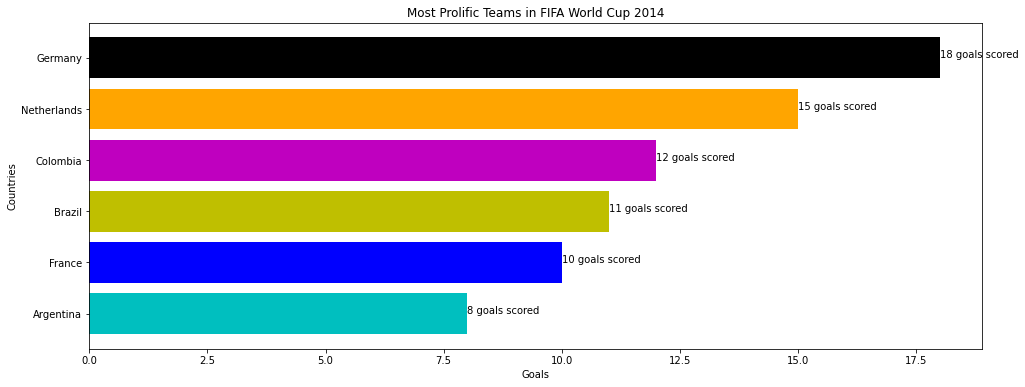

In [50]:
# count_dicti
new = pd.DataFrame.from_dict([count_dicti]).T.sort_values(by=0, ascending=False)
new = new.rename(columns={ 0:'Goals scored'})
new = new.reset_index().head(6)
new = new.rename(columns={ 'index':'Country'})
plt.figure(figsize=(16,6))
for index, value in enumerate(new['Goals scored'].sort_values()):
    plt.text(value, index,
             str(value)  +" goals scored")
plt.barh('Country', 'Goals scored', data=new.sort_values('Goals scored'), color=['c', 'b', 'y', 'm', 'orange', 'k'])
plt.xlabel("Goals")
plt.ylabel("Countries")
plt.title("Most Prolific Teams in FIFA World Cup 2014")
plt.show()

The last four matches of the tournament are shown below

In [51]:
df_wc2014.tail(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
36286,2014-07-08,Brazil,Germany,1,7,FIFA World Cup,Belo Horizonte,Brazil,False,Germany,Brazil,1-7,8
36287,2014-07-09,Netherlands,Argentina,0,0,FIFA World Cup,São Paulo,Brazil,True,Draw,Draw,0-0,0
36289,2014-07-12,Brazil,Netherlands,0,3,FIFA World Cup,Brasília,Brazil,False,Netherlands,Brazil,0-3,3
36291,2014-07-13,Germany,Argentina,1,0,FIFA World Cup,Rio de Janeiro,Brazil,True,Germany,Argentina,1-0,1


Most common scoreline in FIFA World Cup 2014

In [52]:
df_wc2014['scoreline'].value_counts()

2-1    12
0-0     7
1-0     7
0-1     5
1-1     4
3-1     3
1-2     3
2-0     3
0-3     3
3-0     2
1-3     2
2-3     2
2-2     2
2-4     1
1-4     1
4-1     1
0-4     1
2-5     1
0-2     1
4-0     1
1-5     1
1-7     1
Name: scoreline, dtype: int64

## 2. Country with most FIFA world cup wins ever

The answer to this lies in the winner column created. This column however includes information for drawn games. A new dataframe which filters out the drawn games is created and the value_counts function is used to get the countries with most wins in FIFA World cup history

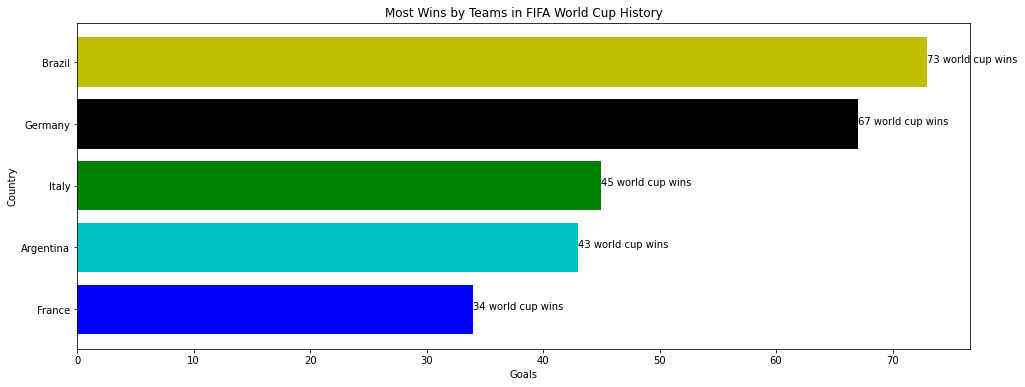

<Figure size 1152x288 with 0 Axes>

In [53]:
df_wc_wins = df_wc[df_wc['winner']!='Draw']['winner']
df_most_wc_matches_won = df_wc_wins.value_counts().head().reset_index()
df_most_wc_matches_won = df_most_wc_matches_won.rename(columns={'index':'Country','winner':'Number of wins'})
df_most_wc_matches_won
plt.figure(figsize=(16,6))
for index, value in enumerate(df_most_wc_matches_won['Number of wins'].sort_values()):
    plt.text(value, index,
             str(value)  +" world cup wins")
plt.barh('Country', 'Number of wins', data=df_most_wc_matches_won.sort_values('Number of wins'), color=['b', 'c', 'g', 'k', 'y'])
plt.xlabel("Goals")
plt.ylabel("Country")
plt.title("Most Wins by Teams in FIFA World Cup History")
plt.figure(figsize=(16,4))
plt.show()

## 3. The tournament with most goals

There are lots of tournaments in this dataset, value_counts will also be used here to determine which tournament has most goals. The newly created column of total goals will be used here acoompanied with the groupby function.

In [54]:
df2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Draw,0-0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,4-2,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,2-1,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,Draw,2-2,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,3-0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43076,2021-12-10,Tunisia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True,Tunisia,Oman,2-1,3
43077,2021-12-10,Qatar,United Arab Emirates,5,0,Arab Cup,Al Khor,Qatar,False,Qatar,United Arab Emirates,5-0,5
43078,2021-12-11,Egypt,Jordan,3,1,Arab Cup,Al Wakrah,Qatar,True,Egypt,Jordan,3-1,4
43079,2021-12-11,Morocco,Algeria,2,2,Arab Cup,Doha,Qatar,True,Draw,Draw,2-2,4


In [55]:
df_tournament_total_goals = df2.groupby('tournament')['total_goals'].sum().reset_index()
df_tournament_total_goals = df_tournament_total_goals.sort_values('total_goals', ascending=False)
df_tournament_total_goals

,tournament,total_goals
66,Friendly,49877
64,FIFA World Cup qualification,22749
113,UEFA Euro qualification,7306
8,African Cup of Nations qualification,4083
36,Copa América,2671
...,...,...
86,Matthews Cup,5
6,AFF Championship qualification,5
54,Cup of Ancient Civilizations,4
108,TIFOCO Tournament,2


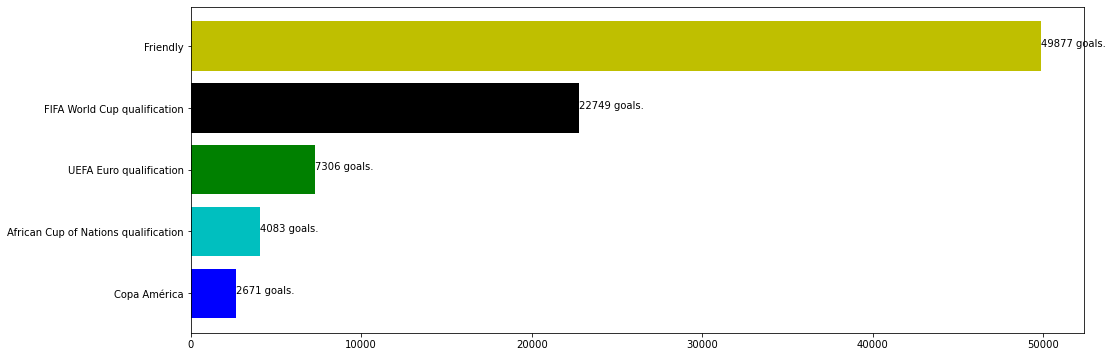

In [56]:
plt.figure(figsize=(16,6))
for index, value in enumerate(df_tournament_total_goals['total_goals'].head().sort_values()):
    plt.text(value, index,
             str(value)  +" goals.")
plt.barh('tournament', 'total_goals', data=df_tournament_total_goals.head().sort_values('total_goals'),
         color=['b', 'c', 'g', 'k', 'y'])
plt.show()

## 4. Best teams in major tournaments

Major tournaments are the apex tournaments held in each continental region as well as the world cup. The qualification tournaments for this major tournaments will be excluded. Friendlies are not major tournaments. UEFA(Europe) seem to have 2 major tournaments), the UEFA cup as well as the UEFA Nations league. The UEFA Nations league will be excluded from the major tournaments.Similarly there is a lesser championship in Africa compared to the majot African Cup of Nations tournament. These lesser tournaments are not included. 

There are 5 qualification regions and the sinlge major tournament for these regions are include.
The FIFA World Cup is inlcuded too as well as the confederations cup.

Africa - African Cup of Nations
Europe - UEFA Euro
Asia (Oceania) - AFC Asian Cup
Oceania - Oceania Nations Cup
North and Central America and the Caribbean - Gold Cup
South America - Copa América
World - FIFA World Cup
World - Confederations Cup

In [57]:
len(df2['tournament'].unique())

126

In [58]:
df2['tournament'].value_counts().head(50)

Friendly                                 17243
FIFA World Cup qualification              7879
UEFA Euro qualification                   2582
African Cup of Nations qualification      1719
FIFA World Cup                             900
Copa América                               841
AFC Asian Cup qualification                728
African Cup of Nations                     690
CECAFA Cup                                 620
CFU Caribbean Cup qualification            606
Merdeka Tournament                         595
British Championship                       505
Gulf Cup                                   380
AFC Asian Cup                              370
Gold Cup                                   358
Island Games                               350
UEFA Euro                                  337
COSAFA Cup                                 309
UEFA Nations League                        308
AFF Championship                           293
Nordic Championship                        283
African Natio

In [59]:
df_major_tournaments = df2[(df2['tournament']=='FIFA World Cup')|(df2['tournament']=='Copa América')
    |(df2['tournament']=='African Cup of Nations')|(df2['tournament']=='AFC Asian Cup')
    |(df2['tournament']=='Gold Cup')|(df2['tournament']=='UEFA Euro')
   |(df2['tournament']=='Confederations Cup')|(df2['tournament']=='Oceania Nations Cup')
    ]
df_major_tournaments

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
438,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,Chile,0-4,4
440,1916-07-06,Argentina,Chile,6,1,Copa América,Buenos Aires,Argentina,False,Argentina,Chile,6-1,7
441,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,Draw,Draw,1-1,2
442,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,Draw,Draw,1-1,2
444,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,Uruguay,Brazil,1-2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42555,2021-07-25,Costa Rica,Canada,0,2,Gold Cup,Arlington,United States,True,Canada,Costa Rica,0-2,2
42556,2021-07-25,United States,Jamaica,1,0,Gold Cup,Arlington,United States,False,United States,Jamaica,1-0,1
42557,2021-07-29,Mexico,Canada,2,1,Gold Cup,Houston,United States,True,Mexico,Canada,2-1,3
42558,2021-07-29,United States,Qatar,1,0,Gold Cup,Austin,United States,False,United States,Qatar,1-0,1


In [60]:
df_major_tournaments[df_major_tournaments['winner']=='Draw']
df_major_tournaments_ = df_major_tournaments[df_major_tournaments['winner']!='Draw']

In [61]:
wc_most_wins = df_major_tournaments_['winner'].value_counts().head(13).reset_index()
wc_most_wins = wc_most_wins.rename(columns={'index':'Country','winner':'Wins'})
wc_most_wins

,Country,Wins
0,Brazil,212
1,Argentina,175
2,Uruguay,141
3,Mexico,103
4,Germany,102
5,United States,86
6,Chile,79
7,Paraguay,72
8,Italy,69
9,France,64


[Text(0, 0, '212'),
 Text(0, 0, '175'),
 Text(0, 0, '141'),
 Text(0, 0, '103'),
 Text(0, 0, '102'),
 Text(0, 0, '86'),
 Text(0, 0, '79'),
 Text(0, 0, '72'),
 Text(0, 0, '69'),
 Text(0, 0, '64'),
 Text(0, 0, '63'),
 Text(0, 0, '63'),
 Text(0, 0, '59')]

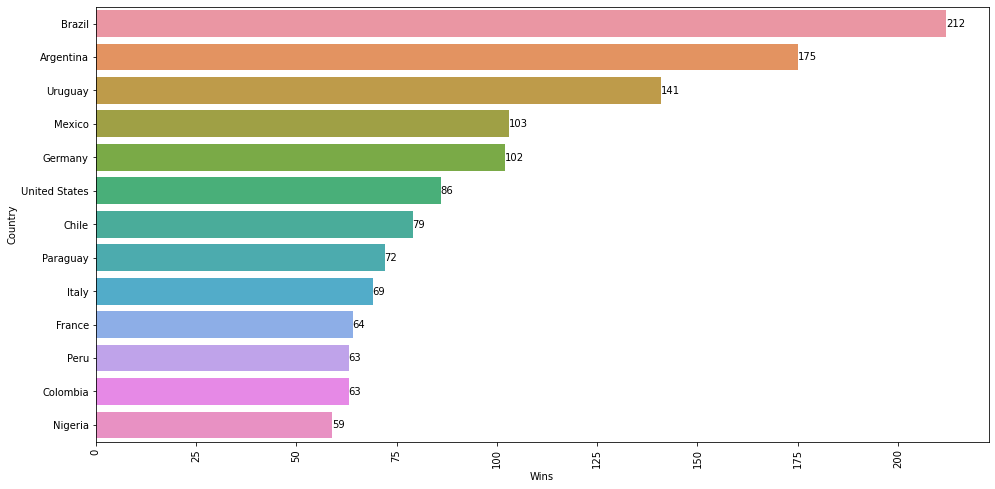

In [62]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
ax1 = sns.barplot(y='Country',x='Wins',data=wc_most_wins)
ax1.bar_label(ax1.containers[0])


It can be seen that Brazil has the most wins in major tournaments. 

## 5. Compare home wins and away wins

We create a dataframe of only home wins. The length of this data frame is simply the number of home wins. Same ting was done for the away wins.

In [63]:
df2[df2['home_score']>df2['away_score']]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,4-2,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,2-1,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,3-0,3
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Scotland,Wales,4-0,4
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Scotland,England,7-2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43071,2021-12-07,Morocco,Saudi Arabia,1,0,Arab Cup,Doha,Qatar,True,Morocco,Saudi Arabia,1-0,1
43073,2021-12-07,Lebanon,Sudan,1,0,Arab Cup,Al Rayyan,Qatar,True,Lebanon,Sudan,1-0,1
43076,2021-12-10,Tunisia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True,Tunisia,Oman,2-1,3
43077,2021-12-10,Qatar,United Arab Emirates,5,0,Arab Cup,Al Khor,Qatar,False,Qatar,United Arab Emirates,5-0,5


In [64]:
len(df2[df2['home_score']>df2['away_score']])

20954

In [65]:
len(df2[df2['home_score']<df2['away_score']])

12199

We can also create a new column that will help aggregate all the home wins, away wins as well as draws. 

In [66]:
def outcome( home_team, away_team, winner):
    if (home_team == winner):
        result = "home win"
    elif (away_team == winner):
        result = "away win"
    else:
        result = 'Draw'
    return result

df2['result']=df2.apply(lambda x: outcome(x['home_team'], x['away_team'], x['winner']), axis=1)

In [67]:
df2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Draw,0-0,0,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,4-2,6,home win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,2-1,3,home win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,Draw,2-2,4,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,3-0,3,home win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43076,2021-12-10,Tunisia,Oman,2,1,Arab Cup,Al Rayyan,Qatar,True,Tunisia,Oman,2-1,3,home win
43077,2021-12-10,Qatar,United Arab Emirates,5,0,Arab Cup,Al Khor,Qatar,False,Qatar,United Arab Emirates,5-0,5,home win
43078,2021-12-11,Egypt,Jordan,3,1,Arab Cup,Al Wakrah,Qatar,True,Egypt,Jordan,3-1,4,home win
43079,2021-12-11,Morocco,Algeria,2,2,Arab Cup,Doha,Qatar,True,Draw,Draw,2-2,4,Draw


To view just the home and away wins, we can simply filter out the draws.

[Text(0, 0, '20954'), Text(0, 0, '12199')]

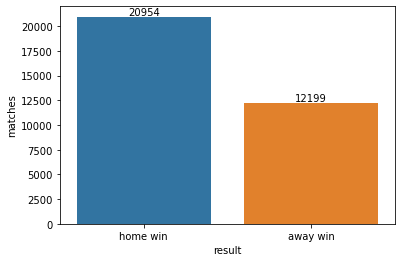

In [68]:
df_home_away = df2[df2['result']!="Draw"]['result'].value_counts().reset_index()
df_home_away = df_home_away.rename(columns={'index':'result','result':'matches'})
ax2 = sns.barplot(x='result',y='matches',data=df_home_away)
ax2.bar_label(ax2.containers[0])


[Text(0, 0, '20954'), Text(0, 0, '12199'), Text(0, 0, '9928')]

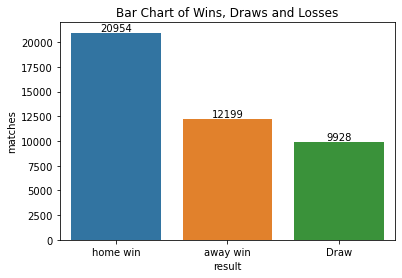

In [69]:
df_home_away = df2['result'].value_counts().reset_index()
df_home_away = df_home_away.rename(columns={'index':'result','result':'matches'})
plt.title("Bar Chart of Wins, Draws and Losses")
ax2 = sns.barplot(x='result',y='matches',data=df_home_away)
ax2.bar_label(ax2.containers[0])


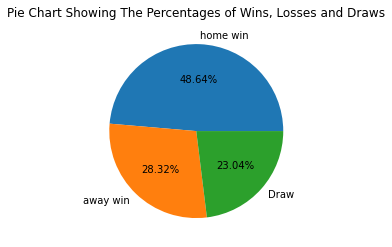

In [70]:
plt.title("Pie Chart Showing The Percentages of Wins, Losses and Draws")
plt.pie(df_home_away['matches'], labels = df_home_away['result'], autopct='%.2f%%')
plt.show()

[Text(0, 0, '15181'), Text(0, 0, '8518'), Text(0, 0, '7196')]

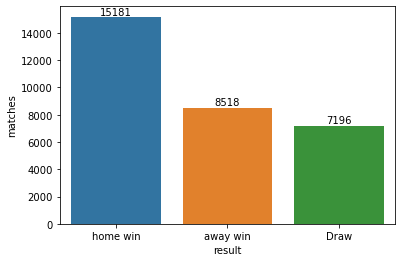

In [71]:
df_home_away_friendly = df2[(df2['tournament']=="Friendly") | (df2['tournament']=="FIFA World Cup qualification")
                            | (df2['tournament']=="FIFA World Cup qualification")
                            | (df2['tournament']=="UEFA Euro qualification")
                            | (df2['tournament']=="African Cup of Nations qualification")
                            | (df2['tournament']=="AFC Asian Cup qualification")
                            | (df2['tournament']=="CFU Caribbean Cup qualification")
                            | (df2['tournament']=="Oceania Nations Cup qualification")
                            | (df2['tournament']=="CONCACAF Nations League qualification")]['result'].value_counts().reset_index()
df_home_away_friendly = df_home_away_friendly.rename(columns={'index':'result','result':'matches'})
df_home_away_friendly
ax2 = sns.barplot(x='result',y='matches',data=df_home_away_friendly)
ax2.bar_label(ax2.containers[0])

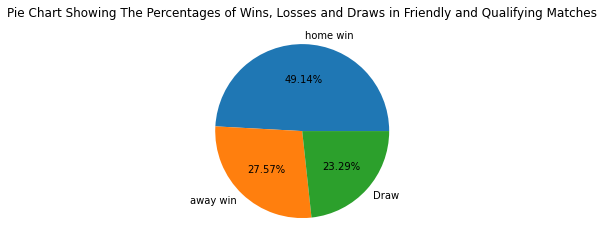

In [72]:
plt.title("Pie Chart Showing The Percentages of Wins, Losses and Draws in Friendly and Qualifying Matches")
plt.pie(df_home_away_friendly['matches'], labels = df_home_away_friendly['result'], autopct='%.2f%%')
plt.show()

In [73]:
df2['tournament'].value_counts().head(30)

Friendly                                17243
FIFA World Cup qualification             7879
UEFA Euro qualification                  2582
African Cup of Nations qualification     1719
FIFA World Cup                            900
Copa América                              841
AFC Asian Cup qualification               728
African Cup of Nations                    690
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Merdeka Tournament                        595
British Championship                      505
Gulf Cup                                  380
AFC Asian Cup                             370
Gold Cup                                  358
Island Games                              350
UEFA Euro                                 337
COSAFA Cup                                309
UEFA Nations League                       308
AFF Championship                          293
Nordic Championship                       283
African Nations Championship      

In [74]:
def year_extract(the_date):
    year_date = the_date[:4]
    return year_date

In [75]:
df3=df2.copy()

Creating a new column which shows only the year in which a match was played.

In [76]:
df3['year_date'] = df3.apply(lambda x: year_extract(x['date']), axis=1)
df3.groupby('year_date')['total_goals'].mean().reset_index().sort_values('total_goals').tail(10)

,year_date,total_goals
13,1885,5.428571
18,1890,5.500000
19,1891,5.666667
1,1873,6.000000
27,1899,6.500000
8,1880,6.666667
21,1893,7.000000
16,1888,7.142857
10,1882,8.000000
6,1878,9.000000


In [77]:
df3[df3['year_date']=='1878']

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,scoreline,total_goals,result,year_date
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Scotland,England,7-2,9,home win,1878
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,Scotland,Wales,9-0,9,home win,1878


In [78]:
df3['year_date'] = df3.apply(lambda x: year_extract(x['date']), axis=1)
df3.groupby('year_date')['total_goals'].mean().reset_index().sort_values('total_goals').head(20).sort_values('year_date')

,year_date,total_goals
0,1872,0.000000
110,1982,2.605744
111,1983,2.600897
112,1984,2.553672
113,1985,2.425569
114,1986,2.379845
115,1987,2.416201
116,1988,2.215356
117,1989,2.328814
118,1990,2.360277


It can be observed here that the years that experienced the most goals on average in football history are all in the 1800s. 
The years with the least goals on average are pretty recent with 19 out of the 20 with least average goals being in the last 40 years.

### Thanks for viewing!